<font size='5'>**Imports**</font>

In [8]:
import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
from datetime import datetime
import altair as alt
import seaborn as sns


<font size='5'>**Create Fred Object**</font>

In [9]:
with open(r'C:\Users\user\Desktop\APIKEY.txt') as file:
    my_key = file.read()

fred = Fred(api_key=my_key)

<font size='5'>**Search Economic Indicators with FRED API and Prepare Dataframes**</font>
- Median household income
- Unemployment rates
- Inflation rates
- Mortgage rates 30 year fixed

<font size='5'>**Median Household Income**</font>


In [10]:
#Loop over the median household income ids and put them into an array/list so we can retrieve data on every state
med_hh_incomedf = fred.search('Real Median Household Income in', limit=20000, order_by='popularity')
med_hh_seriesid = []
for index, value in med_hh_incomedf['id'].iteritems():
    #if value starts with MEHOIN append to list, else ignore
    if value.startswith('MEHOIN'):
        med_hh_seriesid.append(value)

print(med_hh_seriesid)


['MEHOINUSA672N', 'MEHOINUSNYA672N', 'MEHOINUSCAA672N', 'MEHOINUSTXA672N', 'MEHOINUSFLA672N', 'MEHOINUSMNA672N', 'MEHOINUSDCA672N', 'MEHOINUSMIA672N', 'MEHOINUSOHA672N', 'MEHOINUSAZA672N', 'MEHOINUSMAA672N', 'MEHOINUSCOA672N', 'MEHOINUSILA672N', 'MEHOINUSPAA672N', 'MEHOINUSUTA672N', 'MEHOINUSALA672N', 'MEHOINUSNJA672N', 'MEHOINUSKYA672N', 'MEHOINUSINA672N', 'MEHOINUSVAA672N', 'MEHOINUSMSA672N', 'MEHOINUSARA672N', 'MEHOINUSRIA672N', 'MEHOINUSCTA672N', 'MEHOINUSNCA672N', 'MEHOINUSSDA672N', 'MEHOINUSWIA672N', 'MEHOINUSIAA672N', 'MEHOINUSNHA672N', 'MEHOINUSSCA672N', 'MEHOINUSWVA672N', 'MEHOINUSOKA672N', 'MEHOINUSNMA672N', 'MEHOINUSHIA672N', 'MEHOINUSGAA672N', 'MEHOINUSNEA672N', 'MEHOINUSMOA672N', 'MEHOINUSWAA672N', 'MEHOINUSKSA672N', 'MEHOINUSMDA672N', 'MEHOINUSIDA672N', 'MEHOINUSAKA672N', 'MEHOINUSMEA672N', 'MEHOINUSVTA672N', 'MEHOINUSORA672N', 'MEHOINUSMTA672N', 'MEHOINUSNVA672N', 'MEHOINUSWYA672N', 'MEHOINUSLAA672N', 'MEHOINUSTNA672N', 'MEHOINUSNDA672N', 'MEHOINUSDEA672N']


In [11]:
#use the med_hh_seriesid list to get household income data, convert to dict and then to dataframe
med_dict = {}
for id in med_hh_seriesid:
    data = fred.get_series(id)
    med_dict[id] = data

med_dict_df = pd.DataFrame.from_dict(med_dict,orient='index')

#clean up index and column types
#med_dict_df.index.name = 'id'
med_dict_df1 = med_dict_df.copy()

#reduce characters in index
med_dict_df1.index = med_dict_df1.index.str[8:-5]
med_dict_df1.head()


,1984-01-01,1985-01-01,1986-01-01,1987-01-01,1988-01-01,1989-01-01,1990-01-01,1991-01-01,1992-01-01,1993-01-01,...,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
,56780.0,57860.0,60010.0,60760.0,61210.0,62260.0,61500.0,59710.0,59210.0,58920.0,...,65740.0,64900.0,68410.0,70840.0,72090.0,73030.0,78250.0,76660.0,76330.0,74580.0
NY,55800.0,57910.0,60320.0,61510.0,65010.0,67830.0,64880.0,63010.0,60020.0,59780.0,...,61300.0,65690.0,70210.0,73720.0,72570.0,77760.0,81840.0,77400.0,78630.0,75910.0
CA,64060.0,66100.0,69920.0,70280.0,68090.0,71090.0,68370.0,66720.0,67460.0,64260.0,...,74580.0,73170.0,77030.0,79960.0,82580.0,81480.0,88960.0,87530.0,87960.0,85300.0
TX,58330.0,58170.0,58240.0,57640.0,56120.0,55750.0,57980.0,54960.0,54030.0,54180.0,...,63070.0,65170.0,68360.0,69770.0,70860.0,69100.0,76820.0,77110.0,72680.0,74640.0
FL,50120.0,52290.0,55070.0,57100.0,57120.0,56180.0,54810.0,54010.0,52860.0,53850.0,...,59540.0,55810.0,59100.0,61400.0,62600.0,63160.0,66480.0,65110.0,64410.0,65370.0


In [12]:
#change column name datatypes to string
med_dict_df1.columns = pd.to_datetime(med_dict_df1.columns)
column_names = med_dict_df1.columns
print(column_names)

DatetimeIndex(['1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', freq=None)


<font size='5'>**Unemployment Rates**</font>


In [13]:
#search unemployment rates (21k entries)
unemp_rate_s = fred.search('Unemployment rate in ', limit = 100000, order_by='popularity')

#search rates, loop over dataframe, if title starts with "unemployment rate in", push ids to empty list
unemp_rateid = []
for index, value in unemp_rate_s['title'].iteritems():
    #title = value.strip()
    if value.startswith('Unemployment Rate in '):
        unemp_rateid.append(index)
#create search id to find serieis data
ur_id = []
for i in unemp_rateid:
    if len(i) == 4:
        ur_id.append(i)
print(ur_id)

['CAUR', 'TXUR', 'NYUR', 'FLUR', 'OHUR', 'PAUR', 'ALUR', 'GAUR', 'MIUR', 'COUR', 'MAUR', 'AZUR', 'ILUR', 'WIUR', 'MNUR', 'ORUR', 'VAUR', 'TNUR', 'IAUR', 'NCUR', 'NVUR', 'WAUR', 'ARUR', 'NMUR', 'LAUR', 'INUR', 'MDUR', 'MOUR', 'SCUR', 'WVUR', 'OKUR', 'AKUR', 'UTUR', 'MSUR', 'NJUR', 'CTUR', 'MTUR', 'HIUR', 'NDUR', 'IDUR', 'MEUR', 'NEUR', 'KYUR', 'NHUR', 'DCUR', 'DEUR', 'RIUR', 'PRUR', 'WYUR', 'KSUR', 'VTUR', 'SDUR', 'DSUR']


In [14]:
#use ur_id to search, convert to dict, and then convert to df
ur_dict = {}
for id in ur_id:
    data = fred.get_series(id)
    ur_dict[id] = data

ur_dict_df = pd.DataFrame.from_dict(ur_dict, orient='index')

#clean up index
ur_dict_df.index.name = 'id'
ur_dict_df1 = ur_dict_df.copy()
ur_dict_df1.index = ur_dict_df1.index.str[:2]
ur_dict_df1.head(10)

,1976-01-01,1976-02-01,1976-03-01,1976-04-01,1976-05-01,1976-06-01,1976-07-01,1976-08-01,1976-09-01,1976-10-01,...,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01
id,,,,,,,,,,,,,,,,,,,,,
CA,9.2,9.2,9.1,9.1,9.0,9.0,9.0,9.1,9.2,9.3,...,4.4,4.4,4.5,4.5,4.6,4.6,4.6,4.7,4.8,4.9
TX,5.8,5.8,5.9,5.9,5.9,5.9,5.9,5.8,5.7,5.7,...,4.0,4.0,4.0,4.1,4.1,4.1,4.1,4.1,4.1,4.1
NY,10.3,10.3,10.2,10.2,10.1,10.2,10.2,10.2,10.2,10.2,...,4.2,4.1,4.0,3.9,3.9,3.9,3.9,4.0,4.2,4.3
FL,9.7,9.7,9.6,9.5,9.3,9.2,9.1,9.1,9.1,9.1,...,2.6,2.6,2.6,2.6,2.6,2.7,2.7,2.8,2.8,2.9
OH,8.1,8.1,8.1,8.0,7.8,7.6,7.5,7.5,7.5,7.5,...,3.9,3.8,3.7,3.6,3.4,3.3,3.4,3.4,3.6,3.6
PA,8.0,8.1,8.1,8.1,8.1,8.0,7.9,7.9,7.9,7.9,...,4.4,4.2,4.1,4.0,3.8,3.5,3.5,3.4,3.4,3.4
AL,6.6,6.6,6.6,6.5,6.4,6.5,6.6,6.7,6.8,6.9,...,2.5,2.3,2.2,2.2,2.2,2.1,2.1,2.2,2.3,2.4
GA,8.4,8.4,8.4,8.3,8.1,8.0,8.0,8.0,8.0,8.1,...,3.1,3.1,3.1,3.2,3.2,3.2,3.3,3.4,3.4,3.4
MI,9.9,9.9,9.9,9.8,9.6,9.4,9.2,9.1,9.0,9.0,...,4.3,4.1,3.8,3.7,3.6,3.6,3.7,3.9,4.1,4.3


In [15]:
#search US unemp rate returned as series
us_rate_s = fred.get_series(series_id='UNRATE')
us_rate_s = pd.DataFrame(us_rate_s)
us_rate_s.index = pd.to_datetime(us_rate_s.index)

#convert US unemp to df
us_rate_df = pd.DataFrame(us_rate_s)
us_rate_df.columns = us_rate_df.columns.astype(str)


# change index
us_rate_df.reset_index(inplace=True)
us_rate_df.rename(columns={'index': 'date'}, inplace=True)


#rename
# us_rate_df['date'] = pd.to_datetime(us_rate_df['date'])
us_rate_df = us_rate_df.rename(columns={'0': 'rate'})
us_rate_df.head()


,date,rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


<font size='5'>**Mortgage Rates (30 Year Fixed)**</font>


In [16]:
#search mortgage rates for state and US
mortgage_df = fred.get_series(series_id='MORTGAGE30US')
#reindex and turn date column to string
mortgage_df.index = pd.to_datetime(mortgage_df.index)
#convert to df
mortgage_df = mortgage_df.to_frame()
mortgage_df.head()


,0
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29


<font size='5'>**Inflation (Consumer Goods)**</font>


In [17]:
inflation_df = fred.get_series(series_id='FPCPITOTLZGUSA')
inflation_df.index = pd.to_datetime(inflation_df.index)
inflation_df.head()

1960-01-01    1.457976
1961-01-01    1.070724
1962-01-01    1.198773
1963-01-01    1.239669
1964-01-01    1.278912
dtype: float64

<font size='5'>**Altair Visualizations**</font>


In [18]:
#visualize median income chart
med_dict_df1['state'] = med_dict_df1.index
med_data = pd.melt(med_dict_df1, id_vars='state', var_name='date')
med_data = med_data.sort_values(by='state')
med_data['state']= med_data['state'].replace('','US')
med_data.head(100)


,state,date,value
0,US,1984-01-01,56780.0
312,US,1990-01-01,61500.0
728,US,1998-01-01,65980.0
1820,US,2019-01-01,78250.0
52,US,1985-01-01,57860.0
...,...,...,...
1419,AL,2011-01-01,53900.0
587,AL,1995-01-01,46860.0
275,AL,1989-01-01,45840.0
223,AL,1988-01-01,44850.0


In [19]:
#make dropdown selection for year
medstate_dropdown = alt.binding_select(options=list(med_data['state'].unique()), name='Select a State: ')
medstate_selection = alt.selection_point(fields=['state'], bind=medstate_dropdown, name='Year')

#make state median household income - altair line chart
med_line = alt.Chart(med_data).mark_line().encode(
    x=alt.X('date:T', scale=alt.Scale(domain=('1985-01-01', '2025-01-01')), title='Date'),
    y=alt.Y('value:Q', scale=alt.Scale(domain=(0,130000)), title='Median HH Income'),
    color = 'state'
    ).add_params(medstate_selection).transform_filter(
        medstate_selection).interactive()

#make US median household income - altair linechart
filtered_us = med_data[med_data['state'] == 'US']
us_med_line = alt.Chart(filtered_us).mark_line().encode(
    x='date:T', y='value:Q', color = alt.value('red')
)
#layer
layered_med_chart = alt.layer(med_line, us_med_line).properties(
    title="Median Household Income Comparison", width=400
)

layered_med_chart

alt.LayerChart(...)

In [20]:
#clean the unemployment state dataframes
ur_dict_df1['state'] = ur_dict_df1.index
ur_data = pd.melt(ur_dict_df1, id_vars='state', var_name = 'date')
ur_data = ur_data.sort_values(by='state')
ur_data_1 = ur_data.drop('date', axis=1)
#collapse df
ur_data['date'] = pd.to_datetime(ur_data['date'])
ur_data['year'] = ur_data['date'].dt.year
collapsed_ur_df = ur_data.groupby(['state', 'year'])['value'].mean().reset_index()

collapsed_ur_df['year'] = pd.to_datetime(collapsed_ur_df['year'], format='%Y')
collapsed_ur_df.head()

,state,year,value
0,AK,1976-01-01,7.566667
1,AK,1977-01-01,9.891667
2,AK,1978-01-01,10.633333
3,AK,1979-01-01,9.058333
4,AK,1980-01-01,9.533333


In [21]:
# convert to years
us_rate_df['date'] = pd.to_datetime(us_rate_df['date'])
us_rate_df['year'] = us_rate_df['date'].dt.year

#collapse
collapsed_usrate_df = us_rate_df.groupby('year')['rate'].mean().reset_index()
#collapsed_usrate_df.head()
#convert column to time
collapsed_usrate_df['year'] = pd.to_datetime(collapsed_usrate_df['year'], format='%Y')
collapsed_usrate_df.head()

,year,rate
0,1948-01-01,3.750000
1,1949-01-01,6.050000
2,1950-01-01,5.208333
3,1951-01-01,3.283333
4,1952-01-01,3.025000


In [22]:
#make dropdowns
urstate_dropdown = alt.binding_select(options=list(collapsed_ur_df['state'].unique()), name='Select a State: ')
urstate_selection = alt.selection_point(fields=['state'], bind=urstate_dropdown, name='Year')

#make state unemployment line chart
ur_line = alt.Chart(collapsed_ur_df).mark_line().encode(
    x=alt.X('year:T', scale=alt.Scale(domain=('1985', '2025')),title = 'Date'),
    y=alt.Y('value:Q', scale=alt.Scale(domain=(0,20.0)),title='Unemp Rate'),
    color = 'state'
).add_params(urstate_selection).transform_filter(
    urstate_selection).interactive()

us_ur_line = alt.Chart(collapsed_usrate_df).mark_line().encode(
    x=alt.X('year:T', scale=alt.Scale(domain=('1985', '2025')),title = 'Date'),
    y=alt.Y('rate:Q', scale=alt.Scale(domain=(0,20.0))),
    color = alt.value('red')
)

#layer
layered_unemp_chart = alt.layer(ur_line, us_ur_line).properties(title='Unemployment Rates',width=500)

layered_unemp_chart


alt.LayerChart(...)

In [23]:
#mortgage rates 30 year fixed
mortgage_df1 = mortgage_df.reset_index()
mortgage_df1

,index,0
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2748,2023-11-30,7.22
2749,2023-12-07,7.03
2750,2023-12-14,6.95
2751,2023-12-21,6.67


In [24]:
#rename columns and make year column
mortgage_df1.rename(columns={'index':'date', 0:'rate'}, inplace=True)
mortgage_df1['year'] = mortgage_df1['date'].dt.year
mortgage_df1


,date,rate,year
0,1971-04-02,7.33,1971
1,1971-04-09,7.31,1971
2,1971-04-16,7.31,1971
3,1971-04-23,7.31,1971
4,1971-04-30,7.29,1971
...,...,...,...
2748,2023-11-30,7.22,2023
2749,2023-12-07,7.03,2023
2750,2023-12-14,6.95,2023
2751,2023-12-21,6.67,2023


In [25]:
#collapse mortgage
mortgage_collapse_df = mortgage_df1.groupby('year')['rate'].mean().reset_index()
mortgage_collapse_df1 = mortgage_collapse_df
mortgage_collapse_df1.head()

,year,rate
0,1971,7.541750
1,1972,7.383269
2,1973,8.044808
3,1974,9.187115
4,1975,9.047115


In [26]:
#inflation rates convert to df
inflation_df = pd.DataFrame(inflation_df)
inflation_df1 = inflation_df.reset_index()

inflation_df1.head()

,index,0
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [27]:
#rename and convert datatype
inflation_df1.rename(columns={'index':'date', 0:'rate'}, inplace=True)
#convert datatype
# inflation_df1['year'] = inflation_df1['date'].dt.year
inflation_df1.head()


,date,rate
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [28]:
#convert datatype
inflation_df1['year'] = inflation_df1['date'].dt.year
inflation_df1.head()


,date,rate,year
0,1960-01-01,1.457976,1960
1,1961-01-01,1.070724,1961
2,1962-01-01,1.198773,1962
3,1963-01-01,1.239669,1963
4,1964-01-01,1.278912,1964


In [29]:
#collapsed
inflation_collapse_df = inflation_df1.groupby('year')['rate'].mean().reset_index()

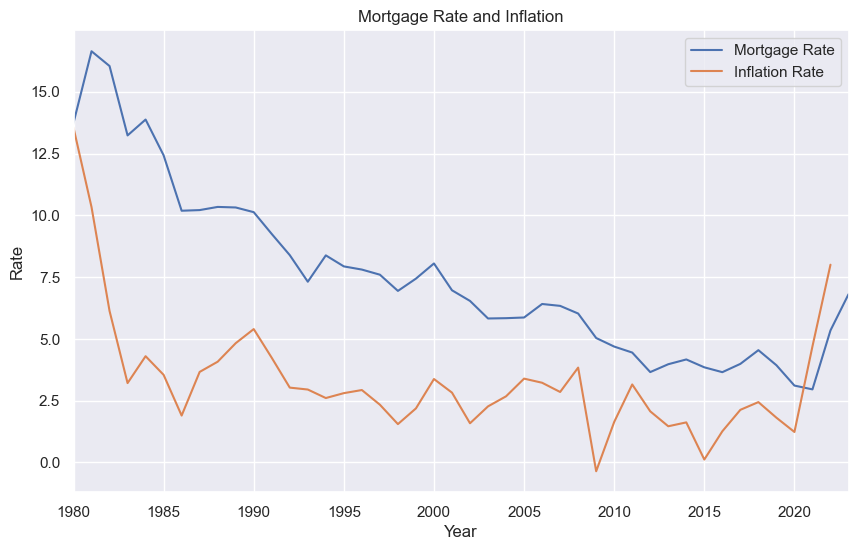

In [30]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))

sns.lineplot(data=mortgage_collapse_df1, x='year', y='rate', label='Mortgage Rate')
sns.lineplot(data=inflation_collapse_df,x= 'year', y='rate', label='Inflation Rate')

plt.xlim(1980,2023)

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Mortgage Rate and Inflation')
plt.legend()
plt.show()
